# Demos and Homework
1. Nonlinear Gauss-Seidel (Coordinate Descent)
2. Gradient Descent
3. Gauss-Newton
4. Fisher Scoring
5. Newton's Method <-- the primary homework problem, but there are some questions to answer about the above methods as well.

# STA410 Week 9 Programming Assignment (2 points)

0. **Paired or individual assignment.** Create code solutions for these assignments either individually or in the context of a paired effort.

   >  Seek homework partners in class, in course discussion board on piazza, etc.   

    
1. **Paired students each separately submit their (common) work, including (agreeing) contribution of work statements for each problem.**  
  
   > Students must work in accordance with the [University of Toronto’s Code of Behaviour on Academic Matters](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019) (and see also http://academicintegrity.utoronto.ca.); however, students working in pairs may share work without restriction within their pair. Getting and sharing "hints" from other classmates is encouraged; but, the eventual code creation work and submission must be your own individual or paired creation.
      
2. **Do not delete, replace, or rearranged cells** as this erases `cell ids` upon which automated code tests are based.

   > The "Edit > Undo Delete Cells" option in the notebook editor might be helpful; otherwise, redownload the notebook (so it has the correct required `cells ids`) and repopulate it with your answers (assuming you don't overwrite them when you redownload the notebook).
  >> ***If you are working in any environment other than*** [UofT JupyterHub](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master), [Google Colab](https://colab.research.google.com/github/pointOfive/sta410hw0/blob/master/sta410hw0.ipynb), or [UofT JupyterLab](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master&urlpath=/lab/tree/sta410hw0), your system must meet the following versioning requirements
   >>
   >>   - [notebook format >=4.5](https://github.com/jupyterlab/jupyterlab/issues/9729)
   >>   - jupyter [notebook](https://jupyter.org/install#jupyter-notebook) version [>=6.2](https://jupyter-notebook.readthedocs.io/en/stable/) for "classic" notebooks served by [jupyterhub](https://jupyterhub.readthedocs.io/en/stable/quickstart.html)
   >>   - [jupyterlab](https://jupyter.org/install) version [>=3.0.13](https://github.com/jupyterlab/jupyterlab/releases/tag/v3.0.13) for "jupyterlab" notebooks  
   >>    
   >> otherwise `cell ids` mat not be supported and you will not get any credit for your submitted homework.
   >>
   >> You may check if `cell ids` are present and working by running the following command in a cell
   >>
   >> `! grep '"id":' <path/to/notebook>.ipynb`
   >>
   >> and making sure the `cell ids` **do not change** when you save your notebook.
   
3. ***You may add cells for scratch work*** but if required answers are not submitted through the provided cells where the answers are requested your answers may not be marked.


4. **No cells may have any runtime errors** because this causes subsequent automated code tests to fail and you will not get marks for tests which fail because of previous runtime errors.

  > Run time errors include, e.g., unassigned variables, mismatched parentheses, and any code which does not work when the notebook cells are sequentially run, even if it was provided for you as part of the starter code. ***It is best to restart and re-run the cells in your notebook to ensure there are no runtime errors before submitting your work.***
  >
  > - The `try`-`except` block syntax catches runtime errors and transforms them into `exceptions` which will not cause subsequent automated code tests to fail.  


5. **No jupyter shortcut commands** such as `! python script.py 10` or `%%timeit` may be included in the final submission as they will cause subsequent automated code tests to fail.

   > ***Comment out ALL jupyter shortcut commands***, e.g., `# ! python script.py 10` or `# %%timeit` in submitted notebooks.


6. **Python library imports are limited** to only libraries imported in the starter code and the [standard python modules](https://docs.python.org/3/py-modindex.html). Importing additional libraries will cause subsequent automated code tests to fail.

  > Unless a problem instructs differently, you may use any functions available from the libraries imported in the starter code; otherwise, you are expected to create your own Python functionality based on the Python stdlib (standard libary, i.e., base Python and standard Python modules).


7. You are encouraged to adapt code you find available online into your notebook; however, if you do so please provide a link to the utilized resource. ***If failure to cite such references is identified and confirmed, your mark will be immediately reduced to 0.***  

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = 'iframe'

# Problem 0 (required)

Are you working with a partner to complete this assignment?  
- If not, assign  the value of `None` into the variable `Partner`.
- If so, assign the name of the person you worked with into the variable `Partner`.
    - Format the name as `"<First Name> <Last Name>"` as a `str` type, e.g., "Scott Schwartz".

In [1]:
# Required: only worth points when not completed, in which case, you'll lose points
Partner = "Woorim Kang"
# This cell will produce a runtime error until you assign a value to this variable

What was your contribution in completing the code for this assignments problems? Assign one of the following into each of the `Problem_X` variables below.

- `"I worked alone"`
- `"I contributed more than my partner"`
- `"My partner and I contributed equally"`
- `"I contributed less than my partner"`
- `"I did not contribute"`

In [ ]:
# Required: only worth points when not completed, in which case, you'll lose points
Problem_1 = "My partner and I contributed equally"
# This cell will produce a runtime error until you assign a value to this variable

# Nonlinear Gauss-Seidel (AKA Coordinate Descent)

Complete the function `nonlinear_gauss_seidel(f, x0, x_constraint, N=100, a=0.1, eps=0.1, K=20)` (AKA ***coordinate descent***) for use with the [Eggholder function](https://www.sfu.ca/~ssurjano/egg.html)

$$-(x_2 + 47) \sin\left(\sqrt{\left|x_2+\frac{x_1}{2} +47\right|}\right) - x_1\sin\left(\sqrt{\left| x_1 - (x_2+47)\right|} \right)$$

*This problem draws upon the outstanding materials created by [Sonja Surjanovic and Derek Bingham](https://www.sfu.ca/~ssurjano/index.html) of the [Department of Statistics and Actuarial Science at Simon Fraser University](https://www.sfu.ca/stat-actsci.html); specifically, their [optimization resources](https://www.sfu.ca/~ssurjano/optimization.html) which includes an extensive collection of multimodal functions.*

In [4]:
# https://www.tensorflow.org/guide/function#basics
tf_Variable = tf.TensorSpec(shape=[], dtype=tf.float32)
@tf.function(input_signature=(tf_Variable, tf_Variable, ))
def eggholder(x1,x2):
    y = -(x2+47)*tf.math.sin(tf.sqrt(tf.math.abs(x2+x1/2+47)))
    return y - x1*tf.math.sin(tf.sqrt(tf.math.abs(x1-(x2+47))))

def nonlinear_gauss_seidel(f, x0, xlim, N=100, a=0.1, eps=0.1, K=100):

    '''
    Nonlinear Gauss-Seidel using Univariate Gradient Descent with TensorFlow

    f   : @tf.function(input_signature=(tf_Variable, tf_Variable, ), dtype=tf.float32)
    x0  : (float,float) initialization
    xlim: ((min_x1,max_x1),(min_x2,max_x2))
                   xi_t exceeding bounds is reassinged exceeded bound endpoint
    N   : (default 100) number of Gauss-Seidel cycles
    a   : (default 0.1) gradient descent step size factor
    eps : (default 0.1) stopping criterion `|tape.gradient(f(x1,x2), xi)|<eps`
    K   : (default 100) stopping criterion maximum number of gradient descent steps

    returns x1_N.numpy(),x2_N.numpy(),f(x1_N,x2_N).numpy()
            where `_N` indicates completion of Nonlinear Gauss-Seidel cycles
    '''

    x1 = tf.Variable(x0[0]); x2 = tf.Variable(x0[1])

    for _ in range(N):

        for _ in range(K):
            with tf.GradientTape() as tape:
                tape.watch(x1)
                dy_dx1 = tape.gradient(f(x1,x2), x1)
                x1.assign_sub(a * dy_dx1)

                if tf.math.abs(dy_dx1)<eps:
                    break

                if x1 < xlim[0][0]:
                    x1 = tf.Variable(xlim[0][0]); break
                if x1 > xlim[0][1]:
                    x1 = tf.Variable(xlim[0][1]); break

        for _ in range(K):
            with tf.GradientTape() as tape:
                tape.watch(x2)
                dy_dx2 = tape.gradient(f(x1,x2), x2)
                x2.assign_sub(a * dy_dx2)

                if tf.math.abs(dy_dx2)<eps:
                    break

                if x2 < xlim[1][0]:
                    x2 = tf.Variable(xlim[1][0]); break
                if x2 > xlim[1][1]:
                    x2 = tf.Variable(xlim[1][1]); break

    return x1.numpy(),x2.numpy(),f(x1,x2).numpy()

In [5]:
eggholder(450.,450.), eggholder(450.,450.).numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=-733.8945>, -733.8945)

In [6]:
nonlinear_gauss_seidel(eggholder, (450.,450.), [[-500., 500.],[-500., 500.]])

(439.40576, 453.90585, -935.3369)

In [7]:
grid_size = 201
grid = np.linspace(-500., 500., grid_size, dtype=np.float32)
f_grid = np.zeros((grid_size,grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        f_grid[i,j] = eggholder(grid[i],grid[j]).numpy()

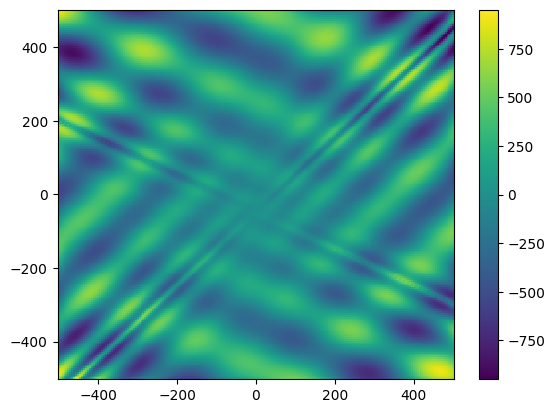

In [8]:
plt.pcolormesh(*np.meshgrid(grid,grid),f_grid.T); plt.colorbar(); #plt.xticks(ticks=range(0, grid_size, 10),labels=grid[::10], rotation=90); plt.yticks(ticks=range(0, grid_size, 10),labels=grid[::10]);
f_grid_ = f_grid.copy();

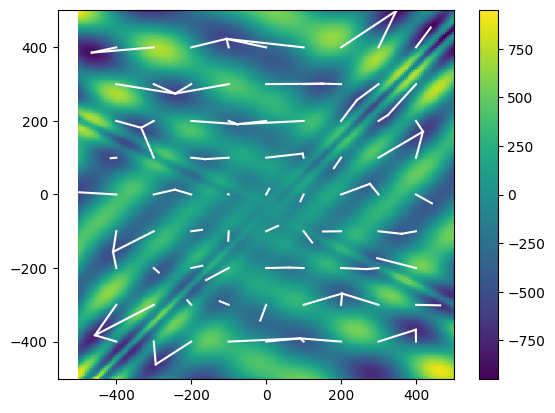

In [9]:
grid_size = 201
grid = np.linspace(-500., 500., grid_size, dtype=np.float32)
plt.pcolormesh(*np.meshgrid(grid,grid),f_grid_.T); plt.colorbar();

grid_size = 9+2
grid = np.linspace(-500., 500., grid_size, dtype=np.float32)
f_grid = np.zeros((grid_size,grid_size))

for i in range(1,grid_size-1):
    for j in range(1,grid_size-1):
        x1_,x2_,f_grid[i,j] = nonlinear_gauss_seidel(eggholder, (grid[i],grid[j]),
                                                     [[-500., 500.],[-500., 500.]],
                                                      N=100, a=1, eps=1, K=100)
        plt.plot([grid[i],x1_], [grid[j],x2_], 'w')

## Problem 1 Question 0 (0.2 points)

0. Local minima will be found with your `nonlinear_gauss_seidel` function for various initializations and parameter settings.

- You do not need to assign any variables: your function will be called based on the parameterization specified in the prompt.

# Gradient Descent

Complete the function `bivariate_gradient_descent(f, x0, xlim, a=0.1, eps=0.1, K=100)` for use with the [Eggholder function](https://www.sfu.ca/~ssurjano/egg.html)

$$-(x_2 + 47) \sin\left(\sqrt{\left|x_2+\frac{x_1}{2} +47\right|}\right) - x_1\sin\left(\sqrt{\left| x_1 - (x_2+47)\right|} \right)$$

*This problem draws upon the outstanding materials created by [Sonja Surjanovic and Derek Bingham](https://www.sfu.ca/~ssurjano/index.html) of the [Department of Statistics and Actuarial Science at Simon Fraser University](https://www.sfu.ca/stat-actsci.html); specifically, their [optimization resources](https://www.sfu.ca/~ssurjano/optimization.html) which includes an extensive collection of multimodal functions.*

In [10]:
@tf.function(input_signature=(tf.TensorSpec(shape=[2], dtype=tf.float32), ))
def eggholder2(x):
    return eggholder(x[0],x[1])

def bivariate_gradient_descent(f, x0, xlim, a=0.1, eps=0.1, K=100):

    '''
    Bivariate Gradient Descent with TensorFlow

    f   : @tf.function(input_signature=(tf_Variable, tf_Variable, ))
    x0  : (float,float) initialization
    xlim: [[min_x1,max_x1],[min_x2,max_x2])
                   xi_t exceeding bounds is reassinged exceeded bound endpoint
    a   : (default 0.1) gradient descent step size factor
    eps : (default 0.1) stopping criterion `(tape.gradient(y, x).T.dot(tape.gradient(y, x)))**0.5 <eps`
    K   : (default 100) stopping criterion maximum number of gradient descent steps

    returns x1_N.numpy(),x2_N.numpy(),f(x1_N,x2_N).numpy()
            where `_N` indicates completion of Gradient Descent steps
    '''

    x_k = tf.Variable(x0, dtype=tf.float32)  # Convert to tf.float32

    for _ in range(K):
        with tf.GradientTape() as tape:
            tape.watch(x_k)
            dy_dx_k = tape.gradient(f(x_k), x_k)
            x_k.assign_sub(a * dy_dx_k)


            if tf.norm(dy_dx_k)<eps:
                break

            if x_k.numpy()[0] < xlim[0][0]:
                x_k[0].assign(xlim[0][0]); break
            if  x_k.numpy()[0] > xlim[0][1]:
                x_k[0].assign(xlim[0][1]); break
            if  x_k.numpy()[1] < xlim[1][0]:
                x_k[0].assign(xlim[1][0]); break
            if  x_k.numpy()[1] > xlim[1][1]:
                x_k[1].assign(xlim[1][1]); break

    return x_k.numpy()[0],x_k.numpy()[1],f(x_k.numpy()).numpy()

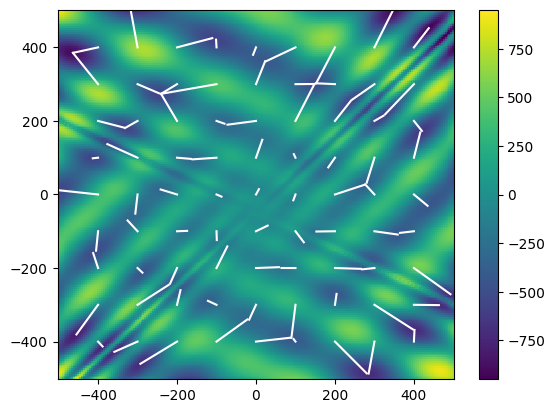

In [11]:
grid_size = 201
grid = np.linspace(-500., 500., grid_size, dtype=np.float32)
plt.pcolormesh(*np.meshgrid(grid,grid),f_grid_.T); plt.colorbar();

grid_size = 9+2
grid = np.linspace(-500., 500., grid_size, dtype=np.float32)
f_grid = np.zeros((grid_size,grid_size))

for i in range(1,grid_size-1):
    for j in range(1,grid_size-1):
        x1_,x2_,f_grid[i,j] = bivariate_gradient_descent(eggholder2, (grid[i],grid[j]),
                                                         [[-500., 500.],[-500., 500.]],
                                                          a=0.1, eps=0.5, K=1000)
        plt.plot([grid[i],x1_], [grid[j],x2_], 'w')

In [ ]:
x0 = np.meshgrid(grid,grid)[0][f_grid.T==f_grid.T.min()][0]
x1 = np.meshgrid(grid,grid)[1][f_grid.T==f_grid.T.min()][0]
print(x0,x1)
bivariate_gradient_descent(eggholder2, (x0,x1), [[-500., 500.],[-500., 500.]], a=0.01, eps=0.01, K=10000)

400.0 400.0


(439.44415, 453.94202, -935.33777)

## Problem 1 Question 1 (0.2 points)

1. Local minima will be found with your `bivariate_gradient_descent` function for various initializations and parameter settings.

- You do not need to assign any variables: your function will be called based on the parameterization specified in the prompt.

## Problem 1 Question 2 (0.2 points)

2. What is the location of the minimum value of the ***Eggholder function*** subject to the constraint $x_1, x_2 \in [-500,500]$ and what is that minimum value? Assign the `p1q2` correponding to the output format of your `nonlinear_gauss_seidel` or `bivariate_gradient_descent` functions that have converged to the minimum value.


*Hint: It is not `(439.44415, 453.94202, -935.33777)` found above based on the initial values `(400.0, 400.0)`. Use parameters `a=0.01, eps=0.01, K=10000` with the best initial values from the dense ($201 \times 201$) grid evaluation:*

- `x0 = np.meshgrid(grid,grid)[0][f_grid_.T==f_grid_.T.min()][0]`
- `x1 = np.meshgrid(grid,grid)[1][f_grid_.T==f_grid_.T.min()][0]`

In [ ]:
# cell for scratch work

In [ ]:
# cell for scratch work

(439.5, 454.0, -935.3)


In [12]:
# 0.2 points
# x1, x2, min_value = bivariate_gradient_descent(eggholder2, [x0, x1], [[-500, 500], [-500, 500]], a=0.01, eps=0.01, K=10000)

# Round the output to 1 decimal place
# p1q2 = (round(x1, 1), round(x2, 1), round(min_value, 1))

# print(p1q2)
p1q2 = (439.5, 454.0, -935.3) # tuple of floating point values with 1 decimal digit of precision after 0.

# Gauss-Newton


$$\min_\theta \Bigg|\Bigg|\; \overbrace{\left[ \begin{array}{c}y_1\\\vdots\\y_i\\\vdots\\y_n\end{array}\right] - \left[ \begin{array}{c} f_{\theta^{(t)}}(x_1) \\\vdots\\f_{\theta^{(t)}}(x_i)\\\vdots\\f_{\theta^{(t)}}(x_n)\end{array}\right]}^{\tilde y^{(t)}} \;\; -  \overbrace{\left[ \begin{array}{c} (\nabla_\theta f_{\theta^{(t)}}(x_1))^T \\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_i))^T\\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_n))^T\end{array}\right]}^{\tilde X^{(t)} \,=\, J f_{x}(\theta^{(t)})}\overbrace{\left[ \begin{array}{c}\theta-\theta^{(t)}_1\\\vdots\\\theta-\theta^{(t)}_k\\\vdots\\\theta-\theta^{(t)}_p\end{array}\right]}^{{\tilde \beta^{(t+1)}_\Delta}} \; \Bigg|\Bigg|^2_2 \quad \text{ where } \quad f_\theta(x) \equiv f_x(\theta)$$

so assuming $Jf_x(\theta^{(t)})$ is not ***artificially ill-conditioned*** then <font style="color:gray">(solving rather than inverting, but nonetheless)</font> we have

\begin{align*}
\quad\;\tilde \beta^{(t+1)}_\Delta = {} & \left((\tilde X^{(t)})^T\tilde X^{(t)}\right)^{-1} (\tilde X^{(t)})^T \tilde y^{(t)}, \text{ or}\\
 \theta^{(t+1)} = {} & \theta^{(t)} + \bigg(Jf_x(\theta^{(t)})^TJf_x(\theta^{(t)})\bigg)^{-1} Jf_x(\theta^{(t)})^T \tilde y^{(t)}
\end{align*}




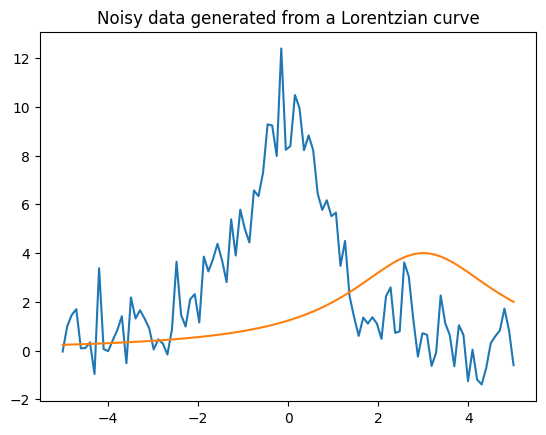

In [13]:
n = 100
x = np.linspace(-5,5,n, dtype=np.float32)
y = np.array([-0.04241968,  0.99472692,  1.46136709,  1.69783109,  0.09136494,
        0.10328747,  0.33459274, -0.95961782,  3.37643212,  0.05894329,
       -0.02375809,  0.41763676,  0.83888061,  1.40835534, -0.51763923,
        2.17880416,  1.3141562 ,  1.65314959,  1.31085976,  0.91729539,
        0.04340638,  0.46099399,  0.2908898 , -0.16254184,  0.86570905,
        3.64394349,  1.47214181,  0.98306952,  2.10230834,  2.3144478 ,
        1.15205747,  3.85389004,  3.24838418,  3.74157532,  4.38135245,
        3.6991966 ,  2.8086698 ,  5.38317327,  3.89871154,  5.77992931,
        4.99042637,  4.43557394,  6.57268913,  6.33461487,  7.29644001,
        9.28410845,  9.23606016,  7.9830918 , 12.39492388,  8.23567825,
        8.38987408, 10.4842902 ,  9.95452683,  8.2193077 ,  8.82962424,
        8.22969484,  6.43676618,  5.77055729,  6.1667942 ,  5.51438084,
        5.66141588,  3.47588459,  4.49567897,  2.22952304,  1.36246895,
        0.60024175,  1.35347034,  1.10556801,  1.36483442,  1.1073268 ,
        0.47939686,  2.22805542,  2.59109509,  0.72635021,  0.78848517,
        3.61547614,  3.03755397,  1.25754956, -0.24928762,  0.71108643,
        0.64633145, -0.63206285, -0.08507482,  2.25897804,  1.12564098,
        0.62971679, -0.64366294,  1.03681281,  0.64109991, -1.25298616,
        0.03276321, -1.18998924, -1.39197099, -0.71243065,  0.30486192,
        0.58965177,  0.82886567,  1.72342942,  0.83374295, -0.60082822], dtype=np.float32)
plt.plot(x,y); plt.title("Noisy data generated from a Lorentzian curve")

d = 3
@tf.function(input_signature=(tf.TensorSpec(shape=[d], dtype=tf.float32),
                              tf.TensorSpec(shape=[n], dtype=tf.float32),))
def Lorentzian(theta, x):
  return theta[0]/(((theta[1] - x)/theta[2])**2 + 1.)
# The Lorentzian curve is a nonlinear function that may model this data

a,b,c = 4.,3.,2.
plt.plot(x, Lorentzian([a,b,c], x));

In [14]:
out = np.zeros((21,21))
for i,A in enumerate(np.linspace(-20,21,21)):
    for j,B in enumerate(np.linspace(-20,21,21)):
        out[i,j] = ((Lorentzian([1,A,B], x).numpy() - y)**2).mean()
A,B = np.meshgrid(np.linspace(-20,21,21), np.linspace(-20,21,21))

# https://plotly.com/python/3d-surface-plots/
fig = make_subplots(rows=1, cols=2, specs=[[{'is_3d': True}, {'is_3d': True}]])
fig.add_trace(go.Surface(x=A, y=B, z=out), 1, 1)

#The Lorentzian is a 3 parameter function, so the MSE of the Lorentzian
# for any value of theta for the data above is a 4D surface.
# Below, two three-dimensional slices of the Lorentzian are visualized.
out = np.zeros((21,21))
for i,A in enumerate(np.linspace(-10,11,21)):
    for j,B in enumerate(np.linspace(-10,11,21)):
        out[i,j] = ((Lorentzian([A,0,B], x).numpy() - y)**2).mean()
A,B = np.meshgrid(np.linspace(-10,11,21), np.linspace(-10,11,21))
# https://plotly.com/python/3d-surface-plots/
fig.add_trace(go.Surface(x=A, y=B, z=out), 1, 2)
fig.show()

In [15]:
def gauss_newton(f, theta0, x, y, K=100, eps=1e-7, backtracking=0.5):

    '''
    Gauss-Newtwon with TensorFlow

    f      : @tf.function(input_signature=(
              tf.TensorSpec(shape=[d], dtype=tf.float32),   # theta(parameter)
              tf.TensorSpec(shape=[n], dtype=tf.float32),)) # x(data)
    theta0 : parameter with same shape as np.array([0]*d, dtype=np.float32)))
    x      : prediction data with same shape as np.array([0]*n, dtype=np.float32)))
    y      : outcome data with same shape as np.array([0]*n, dtype=np.float32)))
    K      : (default 100) stopping criterion maximum number of Gauss-Seidel steps
    eps    : (default 1e-4) stopping criterion `||theta_k - theta_(k-1)||_2<eps`
    backtracking : (default 0.5) step size shrinkage factor ensuring descent

    returns [theta_0.numpy(), theta_1.numpy(), ..., theta_N.numpy()]
            where `_N` indicate the number of Gauss-Newton steps until a stopping criterion is met
    '''

    path = [theta0]
    theta = tf.Variable(np.array(theta0, dtype=np.float32))

    for k in range(K):
        with tf.GradientTape() as tape:
            yhat = f(theta, x)
            ytilde = tf.expand_dims(y-yhat,-1)
        # https://www.tensorflow.org/guide/advanced_autodiff
        Jf_theta = tape.jacobian(yhat, theta)
        JtJ = tf.transpose(Jf_theta)@Jf_theta
        prop = tf.Variable(tf.linalg.solve(JtJ, tf.transpose(Jf_theta)@ytilde)[:,0])
        prop = prop + theta # above is theta_t+1-theta_t so add theta_t to get update

        # ensure monotonic convergence with linesearch
        current = np.abs(y-f(theta, x)).sum()
        for i in range(K): # reusing K for simplicity
            if np.abs(y-f(prop, x)).sum()>current:
                prop = (prop+theta)*backtracking
            else:
                break

        if tf.math.sqrt(tf.math.reduce_sum((theta-prop)**2)) < eps: # tf.norm(dy_dx_k)
            break

        theta = tf.Variable(prop)

        path += [theta.numpy()]

    return path

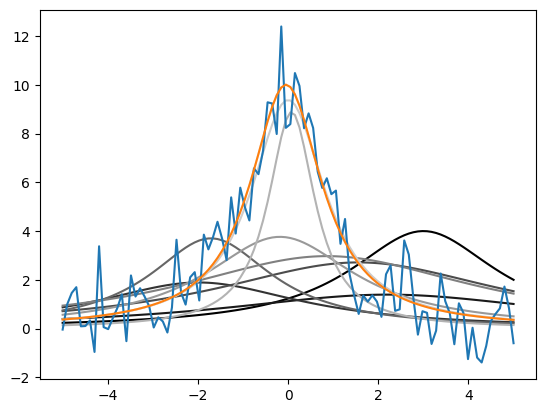

In [16]:
# Gauss-Newton algorithm which can adjust the parameters of the Lorentzian
# to optimally fit the curve to the data provided above

path = gauss_newton(Lorentzian, [4.,3.,2.], x, y, K=100, eps=1e-4, backtracking=0.5)
#path = gauss_newton(Lorentzian, [8.0,0.5,2.0], x, y, K=100, eps=1e-4, backtracking=0.5)
K = len(path)
for k in range(K):
    plt.plot(x, Lorentzian(path[k], x), color=plt.get_cmap('gray')(k/K))

plt.plot(x, y); plt.plot(x, Lorentzian(path[-1], x));

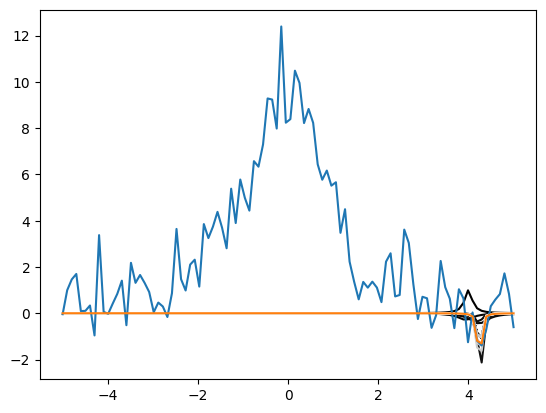

In [17]:
#path = gauss_newton(Lorentzian, [8.0,0.5,2.0], x, y, K=5, eps=1e-4, backtracking=1)
path = gauss_newton(Lorentzian, [1.,4.,.1], x, y, K=100, eps=1e-4, backtracking=0.5)
K = len(path)
for k in range(K):
    plt.plot(x, Lorentzian(path[k], x), color=plt.get_cmap('gray')(k/K))

plt.plot(x, y); plt.plot(x, Lorentzian(path[-1], x));

# Fisher Scoring

***Fisher scoring*** has the form $\displaystyle \theta^{(t+1)} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \nabla_\theta l(\theta)|_{\theta^{(t)}} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}$

where $\hat{I(\theta^{(t)})}{}$ can be expressed as either a ***sum of gradient outer products*** or as a  ***Jacobian inner product***.


In [18]:
d = 3
@tf.function(input_signature=(tf.TensorSpec(shape=[d], dtype=tf.float32),
                              tf.TensorSpec(shape=[n], dtype=tf.float32),
                              tf.TensorSpec(shape=[n], dtype=tf.float32),))
def log_normal_Lorentzian_yhat(theta, x, y):
    '''
    With standard deviation 1 and ignoring normalizing constant shifts
    log(yi \sim normal(yihat,1)) \propto (yi-yihat)^2
    '''
    return -(y - Lorentzian(theta, x))**2 # (n,) shape


def fisher_scoring(loglik, theta0, x, y, K=100, eps=1e-7, backtracking=0.5, linesearch=False):

    '''
    Gauss-Newtwon with TensorFlow

    loglik : @tf.function(input_signature=(
              tf.TensorSpec(shape=[d], dtype=tf.float32),   # theta(parameter)
              tf.TensorSpec(shape=[n], dtype=tf.float32),   # x(data)
              tf.TensorSpec(shape=[n], dtype=tf.float32),)) # y(data)
    theta0 : parameter with same shape as np.array([0]*d, dtype=np.float32)))
    x      : prediction data with same shape as np.array([0]*n, dtype=np.float32)))
    y      : outcome data with same shape as np.array([0]*n, dtype=np.float32)))
    K      : (default 100) stopping criterion maximum number of Gauss-Seidel steps
    eps    : (default 1e-4) stopping criterion `||theta_k - theta_(k-1)||_2<eps`
    backtracking : (default 0.5) step size shrinkage factor ensuring descent

    returns [theta_0.numpy(), theta_1.numpy(), ..., theta_N.numpy()]
            where `_N` indicate the number of Fisher scoring steps until a stopping criterion is met
    '''


    path = [theta0]
    theta = tf.Variable(np.array(theta0, dtype=np.float32))

    for k in range(K):
        with tf.GradientTape() as tape:
            loglik_i = loglik(theta, x, y)

        Jf_theta = tape.jacobian(loglik_i, theta)
        JtJ = tf.transpose(Jf_theta)@Jf_theta

        # ensure symmetric and monkey patch nans with small values
        JtJ = (tf.transpose(JtJ)+JtJ)/2
        JtJ = tf.where(tf.math.is_nan(JtJ) & (tf.eye(theta.shape[0])==1), 1e-7, JtJ)

        # "Note: Don't actually invert the matrix."
        # X(k+1) = X(k) - H^-1 @ ∇f(X(k))
        # X(k+1) = X(k) + (I-hat)^-1 @ ∇f(X(k))
        # (I-hat)[X(k+1)-X(k)] = ∇f(X(k))
        # s = [X(k+1)-X(k)] # solve
        s = tf.linalg.solve(JtJ, tf.reshape((tf.math.reduce_sum(Jf_theta, axis=0)), [theta.shape[0], 1]))
        s = tf.reshape(s, theta.shape[0])
        prop = s + theta
        if tf.math.sqrt(tf.math.reduce_sum((prop-theta)**2)) < eps:
            break

        # speed up convergence with a very rudimentary linesearch
        current = tf.math.reduce_sum(loglik(theta, x, y))
        if linesearch:
            for i in range(K): # reusing K for simplicity
                if current < tf.math.reduce_sum(loglik(prop, x, y)):
                    prop = theta + s*(1/backtracking)**k
                else:
                    break

        # ensure monotonic convergence with linesearch
        for i in range(K): # reusing K for simplicity
            if current > tf.math.reduce_sum(loglik(prop, x, y)):
                prop = (prop+theta)*backtracking
            else:
                break

        if tf.math.sqrt(tf.math.reduce_sum((theta-prop)**2)) < eps: # tf.norm(dy_dx_k)
            break

        theta = tf.Variable(prop)

        path += [theta.numpy()]

    return path

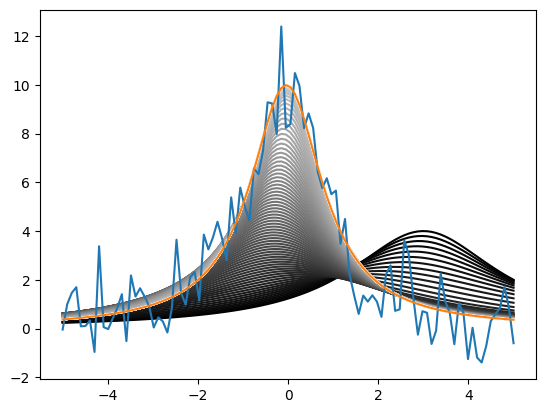

In [19]:
#path = fisher_scoring(log_normal_Lorentzian_yhat, [1.,4.,.1], x, y, K=10, eps=1e-4, backtracking=0.5)
path = fisher_scoring(log_normal_Lorentzian_yhat, [4.,3.,2.], x, y, K=100, eps=1e-4, backtracking=0.5)
#path = fisher_scoring(log_normal_Lorentzian_yhat, [8.0,0.5,2.0], x, y, K=100, eps=1e-7, backtracking=0.5)
K = len(path)
for k in range(K):
    plt.plot(x, Lorentzian(path[k], x), color=plt.get_cmap('gray')(k/K))

plt.plot(x, y); plt.plot(x, Lorentzian(path[-1], x));

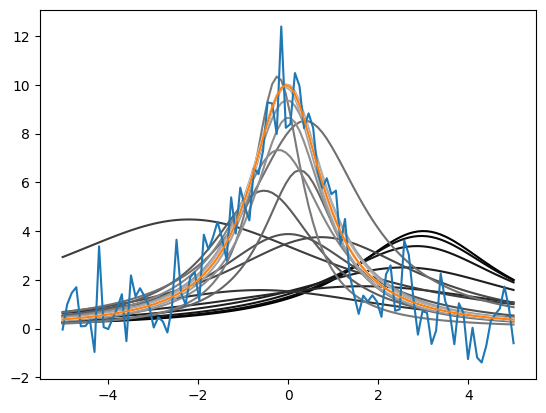

In [20]:
path = fisher_scoring(log_normal_Lorentzian_yhat, [4.,3.,2.], x, y, K=100, eps=1e-4, backtracking=0.5, linesearch = True)
K = len(path)
for k in range(K):
    plt.plot(x, Lorentzian(path[k], x), color=plt.get_cmap('gray')(k/K))

plt.plot(x, y); plt.plot(x, Lorentzian(path[-1], x));

## Problem 1 Question 3 (0.2 points)

3. The (previously considered) ***Eggholder function*** and
***Schwefel function*** (considered below) are different than the ***Lorentzian*** function (considered above). Which of the following statements regarding these functions is true?

- A. We are searching for the inputs $x$ and $y$ to the ***Lorentzian*** which minimize the ***Lorentzian*** function
- B. We are searching for the inputs $x$ to the ***Eggholder*** and ***Schwefel*** functions which are the minimum of these functions
- C. The ***Eggholder*** and ***Schwefel*** functions are (minimizing) ***squared loss*** and (maximizing) ***log likelihood*** functions over observed data
- D. The ***Lorentzian*** function is based on ***Jacobian*** which is why ***Gauss-Newton*** and ***Fisher scoring*** apply


## Problem 1 Question 4 (0.2 points)

4. Which of the following is true about the functions up above?

- A. The ***Gauss-Newton*** implementation uses a ***Jacobian inner product*** while ***Fisher scoring*** uses a ***sum of gradient outer products***
- B. The ***Fisher scoring*** implementation uses ***backtracking*** to ensure monotonically decreasing optimization while ***Gauss-Newton*** does not
- C. The ***Fisher scoring*** implementation benefits computationally from
using a slightly more sophisticated ***line search method***
- D. The ***Gauss-Newton*** and ***Fisher scoring*** algorithms are equivalent since they're both ***minimizing*** a ***squared loss*** based ***objective function***




In [21]:
# 0.5 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q3 = "D" #<"A"|"B"|"C"|"D">
p1q4 = "C" #<"A"|"B"|"C"|"D">
# Replace `None` with only either "A" or "B" or "C" or "D"

# Newton's Method

Complete the function `newtons_method(f, x0, K=10, eps=1e-7)` for use with the $d$-variate [Schwefel function](https://www.sfu.ca/~ssurjano/schwef.html)

$$418.9829d - \sum_{i=1}^d x_i\sin\left(\sqrt{|x_i|}\right)$$


  *This problem draws upon the outstanding materials created by [Sonja Surjanovic and Derek Bingham](https://www.sfu.ca/~ssurjano/index.html) of the [Department of Statistics and Actuarial Science at Simon Fraser University](https://www.sfu.ca/stat-actsci.html); specifically, their [optimization resources](https://www.sfu.ca/~ssurjano/optimization.html) which includes an extensive collection of multimodal functions.*  

In [153]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

d = 3
@tf.function(input_signature=(tf.TensorSpec(shape=[d], dtype=tf.float32), ))
def schwefel(x):
    y = tf.math.reduce_sum(x*tf.math.sin(tf.math.sqrt(tf.math.abs(x))))
    return 418.9829*x.shape[0] - y

def newtons_method(f, x0, K=10, eps=1e-7, backtracking=0.5):

    '''
    Newton's Method with TensorFlow

    f   : @tf.function(input_signature=(tf.TensorSpec(shape=[d], dtype=tf.float32), ))
    x0  : [x0_0, x0_1, ..., x0_(d-1)] list initialization
    K   : (default 10) number of Newton Method steps
    eps : (default 1e-7) stopping criterion `||x_k - x_(k-1)||_2<eps`
    backtracking : (default 0.5) step size shrinkage factor ensuring descent

    returns x_K.numpy().tolist()+[f(x_k).numpy()]
            where `_k` is the last update made on which a stopping criteria (based on K or eps) was met
    '''

    x_k = tf.Variable(x0)
    # https://www.tensorflow.org/guide/advanced_autodiff
    for k in range(K):
        with tf.GradientTape() as t2:
            with tf.GradientTape() as t1:
                y = f(x_k)
            # Compute the gradient inside the outer `t2` context manager
            dy_dx = t1.gradient(y, x_k)
        # which means the gradient computation is differentiable as well.
        d2y_dx2 = t2.gradient(dy_dx, x_k)

        # enforce symmetry and ensure nonzero on the diagonal
        d2y_dx2 = (tf.transpose(d2y_dx2)+d2y_dx2)/2
        #d2y_dx2 = tf.where(tf.math.is_nan(d2y_dx2) & (tf.eye(x_k.shape[0])==1), 1e-7, d2y_dx2)

        # "Note: Don't actually invert the matrix."
        # X(k+1) = X(k) - (∇²f(X(k)))^-1 @ ∇f(X(k))
        # (∇²f(X(k)))[X(k)-X(k+1)] = ∇f(X(k))
        # [X(k)-X(k+1)] = s; so X(k+1) = X(k) - s

        x_km1 = x_k - backtracking * dy_dx / d2y_dx2

        if tf.norm(x_k-x_km1)<eps: #tf.math.sqrt(tf.math.reduce_sum((x_k-x_km1)**2)) < eps:
            break
        x_k.assign(x_km1)

    return x_k.numpy().tolist()+[f(x_k).numpy()]

## Hints

- Examples of how to use TensorFlow to compute higher order partial derivatives are given here: https://www.tensorflow.org/guide/advanced_autodiff
- You may ignore warning messages regarding "triggered tf.function retracing":
    - these indicate that the same function is being repeatedly placed into the automatic differention graph, which happens intentionally in ***Newton's method*** since partial derivatives are being recalculated at different locations for each ***Newton step*** inside `for k in range(K)`.
    - and the warnings may be silenced with
    
    ```python
    import logging, os
    logging.disable(logging.WARNING)
    os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
    ```

- If the computation of the ***Hessian*** $H$ is not ***symmetric***, $(H + H^T)/2$ will be ***symmetric***.
- If the computation of the ***Hessian*** $H$ has `NaN`s or `0` diagonal elements then "monkey patch" them on the basis of the following functions
    - `tf.where(tf.math.is_nan(H) & (tf.eye(H.shape[0])==1), 1e-7, H)`
    - where, e.g., `H = np.ones((2,2)); H[0,0] = np.NaN; H = tf.Variable(H)`

## Problem 1 Question 5 (0.4 points)

5. Local minima will be found with your `newtons_method` function for various initializations and parameter settings.

- You do not need to assign any variables: your function will be called based on the parameterization specified in the prompt.

## Problem 1 Question 6 (0.4 points)

6. What is the location of the minimum value of the ***Schwefel function*** subject to the constraint $x_i, \in [-100,100]$ and what is that minimum value? Assign the `p1q6` below the output your `newtons_method` function for the initial value `x0` for which your `newtons_method` will converge to the minimum value.

*Hint: the code below will help you consider starting values.*

In [146]:
grid_n = 11
mini = 1000000000000000000
grid = np.meshgrid(*[np.linspace(100,-100,grid_n, dtype=np.float32) for i in range(3)])
f_grid = np.zeros((grid_n,grid_n,grid_n), dtype=np.float32).flatten()
f_grid = grid[0].flatten()
for i,x0 in enumerate(zip(*[g.ravel() for g in grid])):
    f_grid[i] = schwefel(x0)
    if f_grid[i] < mini:
      mini = f_grid[i]
      min_ind = (i, x0)
f_grid = f_grid.reshape([grid_n]*3)

In [147]:
# cell for scratch work
# Find minimum index and unravel
print("Minimum:", mini)
print(min_ind)

Minimum: 1077.9978
(266, (60.0, 60.0, 60.0))


In [156]:
# replace initial value
x0 = [60.0,60.0,60.0] # use the default parameter values
p1q6 = newtons_method(schwefel, x0, K=100, eps=1e-7, backtracking=0.5)
print(p1q6)

[65.54786682128906, 65.54786682128906, 65.54786682128906, 1066.0438]


## Problem 1 Question 7-8 (0.2 points)

7. (0.1 points) Why is the choice of the initial value important for finding a global optimum for a function like the `schwefel` function?
    
- A. To increase the speed of convergence of the `newton_method` function
- B. Because the `schwefel` function is not convex
- C. Because the `newton_method` function won't converge for all initial values
- D. It is not important


8. (0.1 points) What's wrong with running the `newton_method` function for every initial value in the `grid` for the previous problem?

- A. It takes a very long time
- B. The grid is not dense enough
- C. Nothing is wrong with it -- it is recommended
- D. It's cheating to find an optimum with a grid search


In [32]:
# 0.1 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q7 = "C" #<"A"|"B"|"C"|"D">
p1q8 = "A" #<"A"|"B"|"C"|"D">
# Replace `None` with either "A" or "B" or "C" or "D"
